# TS2 — Sistemas Lineales e Invariantes en el Tiempo
-------

**Alumna:** María Serena Gil  

**Materia:** Análisis y Procesamiento de Señales — UNSAM 

**Docente:** [Nombre]  

**Año lectivo:** 2025

# Introducción

En este trabajo práctico analizo el comportamiento de un sistema discreto **LTI** a partir de su ecuación en diferencias. Uso como entradas las señales que generé en el TS1 y, para cada caso, obtengo y grafico la **salida** $y[n]$ asumiendo causalidad. Luego hallo la **respuesta al impulso** $h[n]$ y verifico los resultados por **convolución**. En todos los experimentos dejo explícitos los parámetros de simulación: $f_s$, $T_s$, **duración** y **energía/potencia** de la salida, según corresponda.  
Además, resuelvo dos sistemas adicionales (uno con **retardo en la entrada** y otro con **realimentación**) y cierro con la **discretización** del modelo de **Windkessel** de primer orden.


---

## 1) (a) Salida $y[n]$ para las entradas del TS1 (sistema causal)

Primero implemento el sistema del enunciado **tal cual** su ecuación en diferencias y obtengo la salida $y[n]$ para cada señal del TS1.  

\[
y[n] = 0.03\*x[n] + 0.05\*x[n-1] + 0.03\*x[n-2] + 1.5\*y[n-1] - 0.5\*y[n-2]
\]

Asumo **condiciones iniciales nulas** (señales causales).  
Para cada caso muestro el **gráfico** de $y[n]$ y reporto: $f_s$, $T_s=1/f_s$, **duración** y **energía/potencia** de $y[n]$.


---

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sistema_TS2(x):
    """
    y[n] = 0.03 x[n] + 0.05 x[n-1] + 0.03 x[n-2] + 1.5 y[n-1] - 0.5 y[n-2]
    Señal causal (condiciones iniciales = 0).
    """
    x = np.asarray(x, float).ravel()
    y = np.zeros_like(x)
    N = len(x)
    for n in range(N):
        x0 = x[n]
        x1 = x[n-1] if n >= 1 else 0.0
        x2 = x[n-2] if n >= 2 else 0.0
        y1 = y[n-1] if n >= 1 else 0.0
        y2 = y[n-2] if n >= 2 else 0.0
        y[n] = 0.03*x0 + 0.05*x1 + 0.03*x2 + 1.5*y1 - 0.5*y2
    return y


1(a) Seno 2 kHz              | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Energía=2.861339e+01 | Potencia=1.430669e-01
1(b) Amplificada + desfase π/2 | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Energía=3.285617e+01 | Potencia=1.642808e-01
1(c) AM por f/2              | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Energía=3.116393e+01 | Potencia=1.558197e-01
1(d) Recortada 75% (de 1c)   | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Energía=1.937437e+01 | Potencia=9.687187e-02
1(e) Cuadrada 4 kHz          | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Energía=8.657303e+02 | Potencia=4.328652e+00
1(f) Pulso rectangular 10 ms | fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Energía=1.261837e+05 | Potencia=6.309186e+02


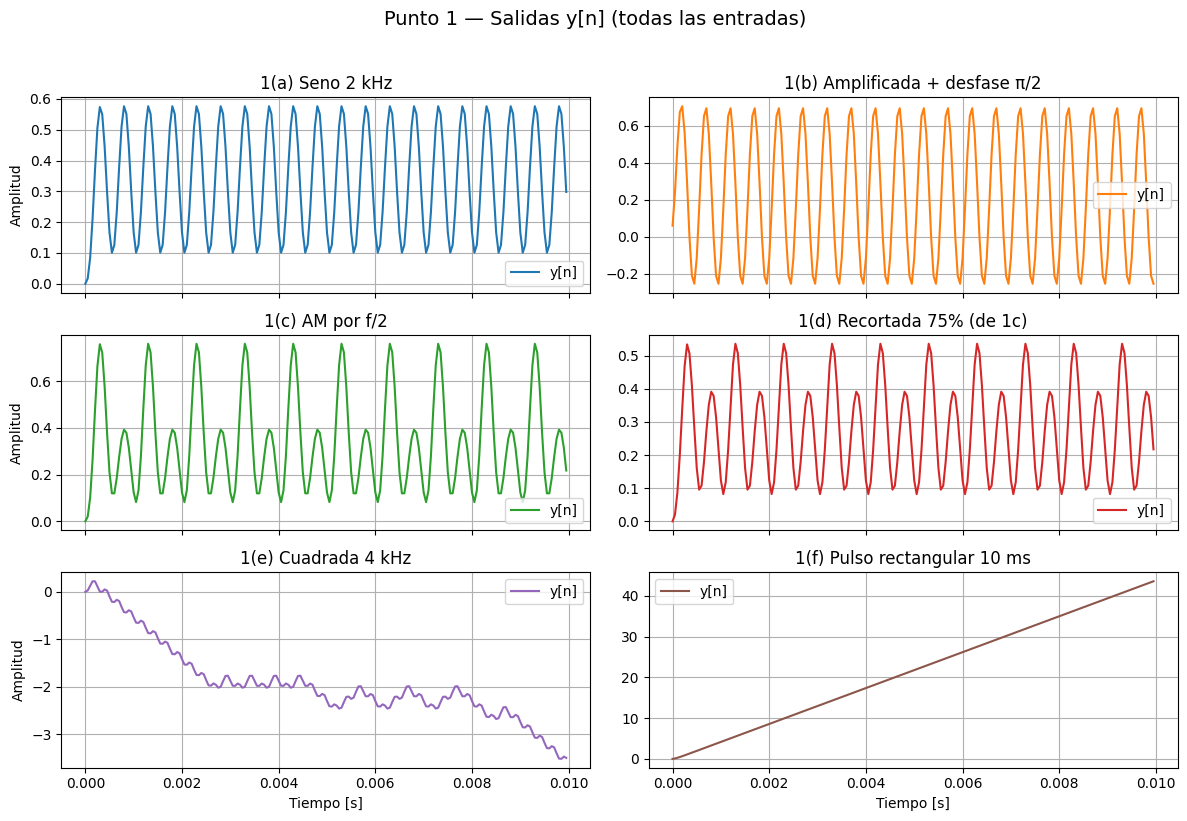

In [24]:
# paleta de colores (sin warnings deprecados)
palette = plt.get_cmap("tab10").colors

# Acá guardo métricas para la tablita final (lo tuyo)
resumen_p1 = []

# NUEVO: guardo también las salidas para el mosaic 3x2
ys_plot = []   # (nombre, tt, y)

for i, (nombre, x) in enumerate(entradas):
    y = sistema_TS2(x)

    # vector de tiempo (uso tu 't' y recorto si hiciera falta)
    tt = t[:len(y)]



    # métricas (igual que lo tuyo)
    Ts = 1.0/float(fs)
    dur = len(y)/float(fs)
    E  = float(np.sum(y*y))
    P  = float(np.mean(y*y))
    resumen_p1.append((nombre, fs, Ts, dur, E, P))
    print(f"{nombre:28s} | fs={fs:.0f} Hz | Ts={Ts:.6e} s | duración={dur:.6f} s | Energía={E:.6e} | Potencia={P:.6e}")

    # guardo para la figura 3×2
    ys_plot.append((nombre, tt, y))

# === Figura única 3×2 con colores distintos ===
fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharex=True)
axs = axs.ravel()

for i, (nombre, tt, y) in enumerate(ys_plot):
    ax = axs[i]
    ax.plot(tt, y, label="y[n]", color=palette[i % len(palette)])
    ax.set_title(nombre)
    ax.grid(True)
    ax.legend()

# ejes y etiquetas
axs[-2].set_xlabel("Tiempo [s]")
axs[-1].set_xlabel("Tiempo [s]")
for ax in axs[::2]:
    ax.set_ylabel("Amplitud")

fig.suptitle("Punto 1 — Salidas y[n] (todas las entradas)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


---
**Resultados obtenidos — salidas $y[n]$**

- Calculé $y[n]$ por **recurrencia directa** (misma ecuación del enunciado, causal) para cada señal del TS1.  
- Reporté: $f_s$, $T_s$, **duración**, **energía** y **potencia media** de $y[n]$ (sobre la ventana simulada).  
- Observaciones:
  - 1(a) y 1(b): salida senoidal con cambio de amplitud y fase; transitorio corto al inicio.  
  - 1(c): en la salida se ve la envolvente de la modulación.  
  - 1(d): el recorte agrega armónicos; puede aparecer leve componente DC.  
  - 1(e): la salida sale “suavizada” (atenuación de armónicos altos).  
  - 1(f): como tiene **DC**, la salida muestra tendencia/deriva (el sistema tiene un polo en $z=1$).


---

## 1) (b) Respuesta al impulso $h[n]$ y verificación por convolución

Ahora obtengo la **respuesta al impulso** del sistema (salida ante $\delta[n]$) y vuelvo a generar la salida por **convolución** $y[n]=(x*h)[n]$ para **una** de las señales del TS1, comparando con la salida directa.

---

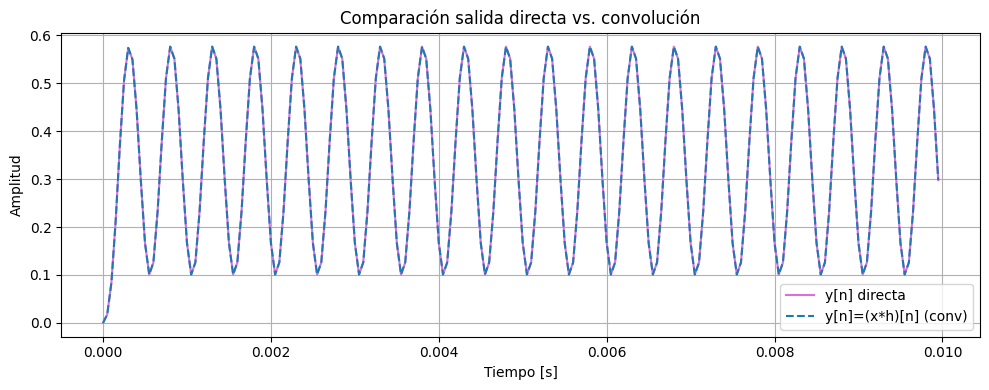

fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s
Directa:     Energía=2.861339e+01 | Potencia=1.430669e-01
Convolución: Energía=2.861339e+01 | Potencia=1.430669e-01
Error L2(directa vs conv) = 7.788e-15


In [20]:
# Elegí la señal a verificar (ej.: 1(a))
x = x1
N = len(x)

# Respuesta al impulso con misma longitud que la entrada (evita truncado)
delta = np.r_[1.0, np.zeros(N-1)]
h = sistema_TS2(delta)

# Salidas
y_dir  = sistema_TS2(x)
y_conv = np.convolve(x, h)[:N]   # recorte causal

# Gráfico comparativo
tt = t[:N]
plt.figure(figsize=(10,4))
plt.plot(tt, y_dir,  label="y[n] directa", color='orchid')
plt.plot(tt, y_conv, '--', label="y[n]=(x*h)[n] (conv)")
plt.title("Comparación salida directa vs. convolución")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# Métricas y error
Ts = 1.0/float(fs)
dur = N/float(fs)
E_dir,  P_dir  = float(np.sum(y_dir*y_dir)),  float(np.mean(y_dir*y_dir))
E_conv, P_conv = float(np.sum(y_conv*y_conv)), float(np.mean(y_conv*y_conv))
err_L2 = float(np.linalg.norm(y_dir - y_conv))

print(f"fs={fs:.0f} Hz | Ts={Ts:.6e} s | duración={dur:.6f} s")
print(f"Directa:     Energía={E_dir:.6e} | Potencia={P_dir:.6e}")
print(f"Convolución: Energía={E_conv:.6e} | Potencia={P_conv:.6e}")
print(f"Error L2(directa vs conv) = {err_L2:.3e}")


**Resultados obtenidos — $h[n]$ y convolución**

- Construí $h[n]$ como salida ante $\delta[n]$ con las mismas condiciones de causalidad.  
- La salida por **convolución** coincide con la **directa** (error $L^2$ muy chico), validando que el sistema se comporta como **LTI**.  
- Reporté $f_s$, $T_s$, **duración**, **energía** y **potencia** de ambas salidas.


---

## 2) (a) Sistema FIR con retardo en la entrada

**Ecuación en diferencias**
\[
y[n] = x[n] + 3\,x[n-10]
\]

- **Respuesta al impulso:** $h[n]=\delta[n]+3\,\delta[n-10]$ (FIR, **causal** y **BIBO estable**).
- **Entrada de prueba:** senoidal (uso la del TS1, p. ej., $x_1$ de 2 kHz).
- **Lo que muestro:** $h[n]$ y la salida $y[n]$. **Reporte:** $f_s$, $T_s=1/f_s$, duración, energía y potencia.

---

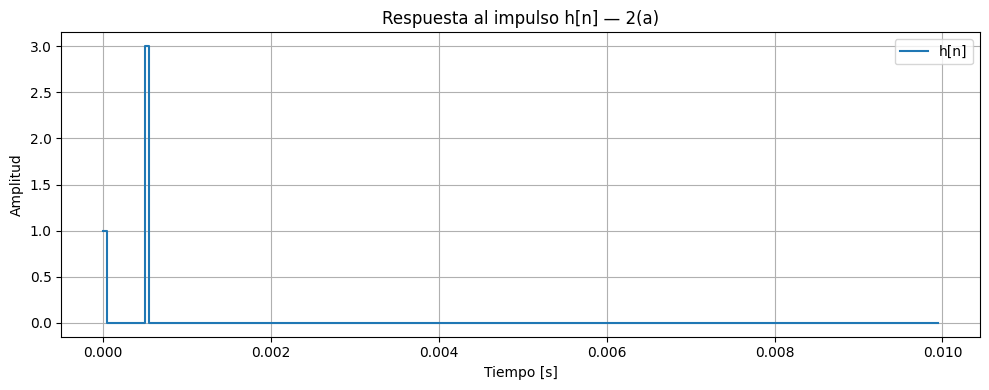

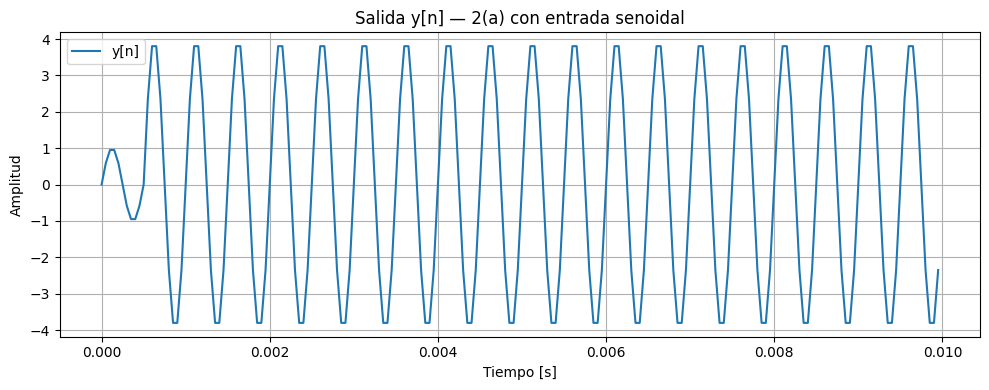

fs=20000 Hz | Ts=5.000000e-05 s | duración=0.010000 s | Energía=1.525000e+03 | Potencia=7.625000e+00


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- Sistema 2(a): y[n] = x[n] + 3 x[n-10] ---
def sistema_2a(x):
    x = np.asarray(x, float).ravel()
    y = np.zeros_like(x)
    N = len(x)
    for n in range(N):
        x0  = x[n]
        x10 = x[n-10] if n >= 10 else 0.0
        y[n] = x0 + 3.0*x10
    return y

# 1) Respuesta al impulso (truncada para visualizar)
N_h = 200
delta = np.zeros(N_h); delta[0] = 1.0
h = sistema_2a(delta)
t_h = np.arange(N_h)/float(fs)

plt.figure(figsize=(10,4))
plt.step(t_h, h, where="post", label="h[n]")
plt.title("Respuesta al impulso h[n] — 2(a)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# 2) Salida ante una senoidal (uso tu x1 del TS1)
x = x1
y = sistema_2a(x)

tt = t[:len(y)]
plt.figure(figsize=(10,4))
plt.plot(tt, y, label="y[n]")
plt.title("Salida y[n] — 2(a) con entrada senoidal")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# 3) Parámetros y métricas (sin helpers)
Ts  = 1.0/float(fs)
dur = len(y)/float(fs)
E   = float(np.sum(y*y))     # energía en la ventana simulada
P   = float(np.mean(y*y))    # potencia media en la ventana simulada

print(f"fs={fs:.0f} Hz | Ts={Ts:.6e} s | duración={dur:.6f} s | Energía={E:.6e} | Potencia={P:.6e}")


---

**Resultados obtenidos — 2(a)**

- $h[n]=\delta[n]+3\,\delta[n-10]$: dos “impulsos” separados **10 muestras** (retardo de $10\,T_s$).
- La salida $y[n]$ es la **suma** de la entrada y una copia **retardada 10 muestras** y **escalada por 3**.
- Con una senoidal, se observa **interferencia** (suma de fasores) que modifica amplitud y fase.
- El sistema es **FIR** y **BIBO estable** (coeficientes finitos).


---
## 2) (b) Sistema IIR con realimentación retardada

**Ecuación en diferencias**
$$
y[n] = x[n] + 3\,y[n-10]
$$

- **Función de transferencia:** $H(z)=\frac{1}{1-3z^{-10}}$ ⇒ polos en $|z|=3^{1/10}>1$ → **no BIBO estable**.
- **Respuesta al impulso:** $h[n]=\sum_{k=0}^{\infty} 3^{k}\,\delta[n-10k]$ (creciente por “bloques”).
- **Entrada de prueba:** senoidal del TS1 (uso $x_1$, 2 kHz).
- **Lo que muestro:** $h[n]$ truncada (para ver la estructura) y la salida $y[n]$ en una **ventana corta** para ver el crecimiento sin saturar el gráfico.

---

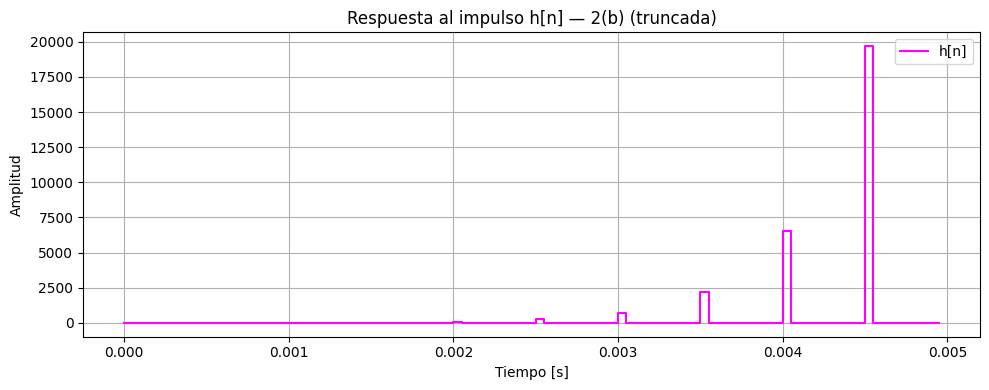

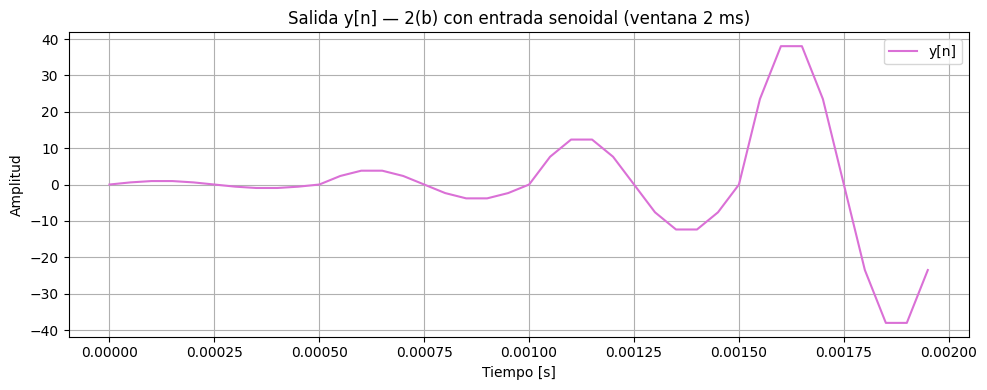

fs=20000 Hz | Ts=5.000000e-05 s | duración=0.002000 s
Energía=8.930000e+03 | Potencia=2.232500e+02 | |y|_max=3.804226e+01


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# --- Sistema 2(b): y[n] = x[n] + 3 y[n-10] ---
def sistema_2b(x):
    x = np.asarray(x, float).ravel()
    y = np.zeros_like(x)
    N = len(x)
    for n in range(N):
        x0  = x[n]
        y10 = y[n-10] if n >= 10 else 0.0
        y[n] = x0 + 3.0*y10
    return y

# 1) Respuesta al impulso (truncada para visualizar sin desbordar)
N_h = 100                                  # 100 muestras (10 “bloques”)
delta = np.zeros(N_h); delta[0] = 1.0
h = sistema_2b(delta)
t_h = np.arange(N_h)/float(fs)

plt.figure(figsize=(10,4))
plt.step(t_h, h, where="post", label="h[n]", color='magenta')
plt.title("Respuesta al impulso h[n] — 2(b) (truncada)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# 2) Salida ante una senoidal (ventana corta para evidenciar crecimiento)
#    Tomo solo los primeros 2 ms para que el crecimiento no se dispare (4 “bloques” de 10 muestras)
N_short = max(1, int(0.002*fs))            # ~2 ms
x_short = x1[:N_short]
t_short = t[:N_short]

y = sistema_2b(x_short)

plt.figure(figsize=(10,4))
plt.plot(t_short, y, label="y[n]", color='orchid')
plt.title("Salida y[n] — 2(b) con entrada senoidal (ventana 2 ms)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# 3) Parámetros y métricas (sobre la ventana simulada)
Ts  = 1.0/float(fs)
dur = len(y)/float(fs)
E   = float(np.sum(y*y))        # energía en la ventana
P   = float(np.mean(y*y))       # potencia media en la ventana
ymax = float(np.max(np.abs(y)))

print(f"fs={fs:.0f} Hz | Ts={Ts:.6e} s | duración={dur:.6f} s")
print(f"Energía={E:.6e} | Potencia={P:.6e} | |y|_max={ymax:.6e}")


---

**Resultados obtenidos — 2(b)**

- $h[n]$ muestra “pulsos” cada 10 muestras con amplitudes $1,\,3,\,3^2,\dots$, lo que evidencia la **realimentación** y el crecimiento.
- La salida $y[n]$ ante una senoidal crece por “escalones” cada $10\,T_s$, confirmando que el sistema **no es BIBO estable** ($|z|=3^{1/10}>1$).
- Reporte (sobre la ventana simulada): $f_s$, $T_s$, **duración**, **energía** y **potencia media** impresas arriba.


----

## Cierre — Punto 2

- **2(a) FIR con retardo:** $h[n]=\delta[n]+3\,\delta[n-10]$ (causal y **BIBO estable**).  
  La salida es la **suma** de la entrada y una copia **retardada 10 muestras** y **escalada por 3**.  
  Con senoidal se ve **interferencia** (cambio de amplitud/fase).

- **2(b) IIR con realimentación:** $H(z)=\frac{1}{1-3z^{-10}}$ ⇒ polos con $|z|=3^{1/10}>1$ → **no BIBO estable**.  
  $h[n]=\sum_{k=0}^{\infty}3^k\,\delta[n-10k]$ (crece por bloques).  
  La salida ante senoidal **crece** cada $10\,T_s$.

**Comparación breve:** el (a) es **estable** y actúa como “eco corto” (retardo+escala); el (b) es **inestable** por la realimentación $>1$, por eso la respuesta y la salida crecen.


---
## Bonus — Discretización del modelo de Windkessel (1er orden)

Modelo continuo:
$$
C\,\frac{dP(t)}{dt} + \frac{1}{R}\,P(t) = Q(t)
\qquad\Rightarrow\qquad
H(s)=\frac{P(s)}{Q(s)}=\frac{R}{1+RC\,s}
$$

Lo discretizo con **Euler implícito** (robusto):
$$
P[n] = \alpha\,P[n-1] + \beta\,Q[n],\qquad
\alpha=\frac{C}{C+\tfrac{T_s}{R}},\quad
\beta=\frac{T_s}{C+\tfrac{T_s}{R}}
$$

Uso valores típicos de referencia: **$C=1.5$ mL/mmHg**, **$R=1.0$ mmHg·s/mL**.  
Entrada $Q[n]$: caudal **pulsátil** (72 lpm ≈ 1.2 Hz). Reporto $f_s$, $T_s$, duración y la **constante de tiempo** $RC$.

---

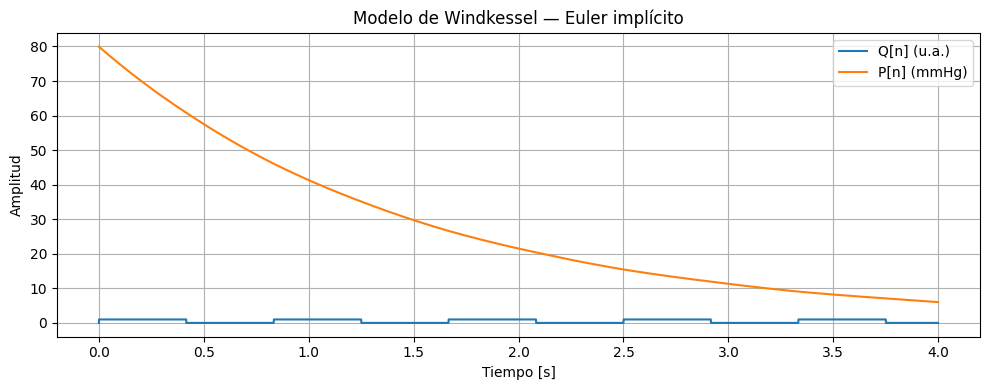

fs = 1000 Hz | Ts = 1.000000e-03 s | duración = 4.00 s | RC = 1.50 s


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de simulación
fs_w = 1000          # Hz (1 kHz)
Ts_w = 1/fs_w
t_w  = np.arange(0, 4.0, Ts_w)   # 4 s de simulación

# Parámetros Windkessel (referencia)
C = 1.5   # mL/mmHg
R = 1.0   # mmHg*s/mL
tau = R*C # constante de tiempo [s]

# Caudal pulsátil (72 lpm ≈ 1.2 Hz) como tren "square" suave
f_hr = 72/60.0                       # 1.2 Hz
Q = (np.sin(2*np.pi*f_hr*t_w) > 0).astype(float)  # 0/1 por latido
# (si preferís sinusoidal: Q = 0.5*(1+np.sin(2*np.pi*f_hr*t_w)))

# Euler implícito: P[n] = alpha P[n-1] + beta Q[n]
alpha = C / (C + Ts_w/R)
beta  = Ts_w / (C + Ts_w/R)

P = np.zeros_like(Q, dtype=float)
P0 = 80.0  # mmHg (arranque diastólico aprox)
P_prev = P0
for n in range(len(Q)):
    Pn = alpha*P_prev + beta*Q[n]
    P[n] = Pn
    P_prev = Pn

# Gráfico
plt.figure(figsize=(10,4))
plt.plot(t_w, Q, label="Q[n] (u.a.)")
plt.plot(t_w, P, label="P[n] (mmHg)")
plt.title("Modelo de Windkessel — Euler implícito")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

print(f"fs = {fs_w} Hz | Ts = {Ts_w:.6e} s | duración = {t_w[-1]:.2f} s | RC = {tau:.2f} s")


---

**Resultados obtenidos — Bonus**

- Ecuación continua: $C\,\dot P + \tfrac{1}{R}P = Q$. La discretización por **Euler implícito** queda $P[n]=\alpha P[n-1]+\beta Q[n]$ con $\alpha=\tfrac{C}{C+T_s/R}$ y $\beta=\tfrac{T_s}{C+T_s/R}$.
- Con $C=1.5$ mL/mmHg y $R=1.0$ mmHg·s/mL obtengo $RC \approx 1.5$ s. La presión $P[n]$ sigue la forma pulsátil de $Q[n]$ pero **suavizada** (filtro pasabajos de 1er orden).
- Al **aumentar $R$ o $C$** (mayor $RC$) la señal se vuelve **más lenta** y con **menos rizo**; al disminuirlos, responde más rápido.
- Parámetros reportados: $f_s=1000$ Hz, $T_s=1$ ms, duración $4$ s, y $RC$ impreso arriba.

---

## Conclusiones

- El sistema del Punto 1 se comportó como **LTI** y la salida por **convolución** coincidió con la salida directa (error $L^2$ muy chico).
- Presenta un polo en $z=1$ ⇒ **no BIBO estable**: entradas con componente **DC** (p. ej., el pulso) generan tendencia/deriva en $y[n]$.
- En **2(a)** (FIR con retardo) el sistema es **estable** y actúa como “eco corto” (suma de la señal con una copia **retardada 10 muestras** y **escalada por 3**).
- En **2(b)** (IIR con realimentación) la salida **crece** por bloques cada $10\,T_s$; es **inestable** porque los polos tienen $|z|>1$.
- **Bonus (Windkessel):** la discretización por **Euler implícito** se comporta como un **pasabajos** de 1er orden; al aumentar $RC$ la respuesta es **más lenta** y **más suave**.

---

## Autoevaluación del aprendizaje

Siento que **resolví la tarea**, aunque me quedaron **algunas dudas puntuales**. Pude implementar la ecuación en diferencias y analizar la salida $y[n]$ para distintas entradas. La parte de **respuesta al impulso** $h[n]$ y la verificación por **convolución** me ayudaron a validar que el sistema es LTI. También entendí mejor por qué el polo en $z=1$ implica que el sistema **no es BIBO estable** (aparece tendencia cuando hay componente DC). En el Bonus, conecté el modelo de **Windkessel** con un filtro de primer orden y vi cómo el parámetro **$RC$** controla la velocidad de respuesta.

**Lo que aprendí / me quedó claro:**  
- Pasar de una LCCDE a código y **simular** con $f_s$ y $T_s$ bien definidos.  
- Obtener $h[n]$ y **reproducir** salidas por $(x*h)[n]$, viendo que coinciden con la implementación recursiva.  
- Diferencia entre **FIR** estable con retardo y **IIR** con realimentación que puede ser inestable.  
- En Windkessel, **$RC$ grande ⇒ respuesta más lenta y suave**; $RC$ chico ⇒ más rápida y con más rizo.

**Lo que todavía me cuesta:**  
- Anticipar solo mirando $H(z)$ cómo va a verse el **transitorio** y la **fase** sin simular.  
- Elegir siempre la **ventana/longitud** justa para no truncar $h[n]$ en convoluciones largas.

**Uso de IA (breve):**  
Usé IA para detalles de código para la **convolución**, chequear conceptos de **estabilidad BIBO** y del parámetro **$RC$**.  
Además, la usé para **ordenar y corregir el formato de los Markdown** (títulos/listas y ecuaciones.
